/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


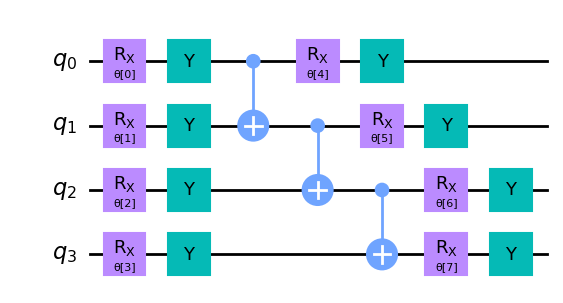

In [1]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)
ansatz.decompose().draw("mpl")

In [2]:
from qiskit_ibm_provider import IBMProvider

IBMProvider.save_account("2e433c09c9a3d034dc924cd7f280c49f7cc89518663e74863db06c8903eafcde3300afbdb6273405def2e71dd9864573e4f6db76c9e695f6c64fc111d67efe1a",overwrite=True)
IBMProvider.saved_accounts()

# pode ser necessário definir o argumento "instance"
# ver na IBM quantum platform >> account >> manage account >> profile overvies
provider = IBMProvider()

In [3]:
provider.backends()

[<IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>]

In [4]:
quantum_devices_available = provider.backends(simulator=False, operational=True)

quantum_devices_available

[<IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>]

In [5]:
backend = quantum_devices_available[0]

backend

<IBMBackend('ibm_osaka')>

/home/polyana/.local/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


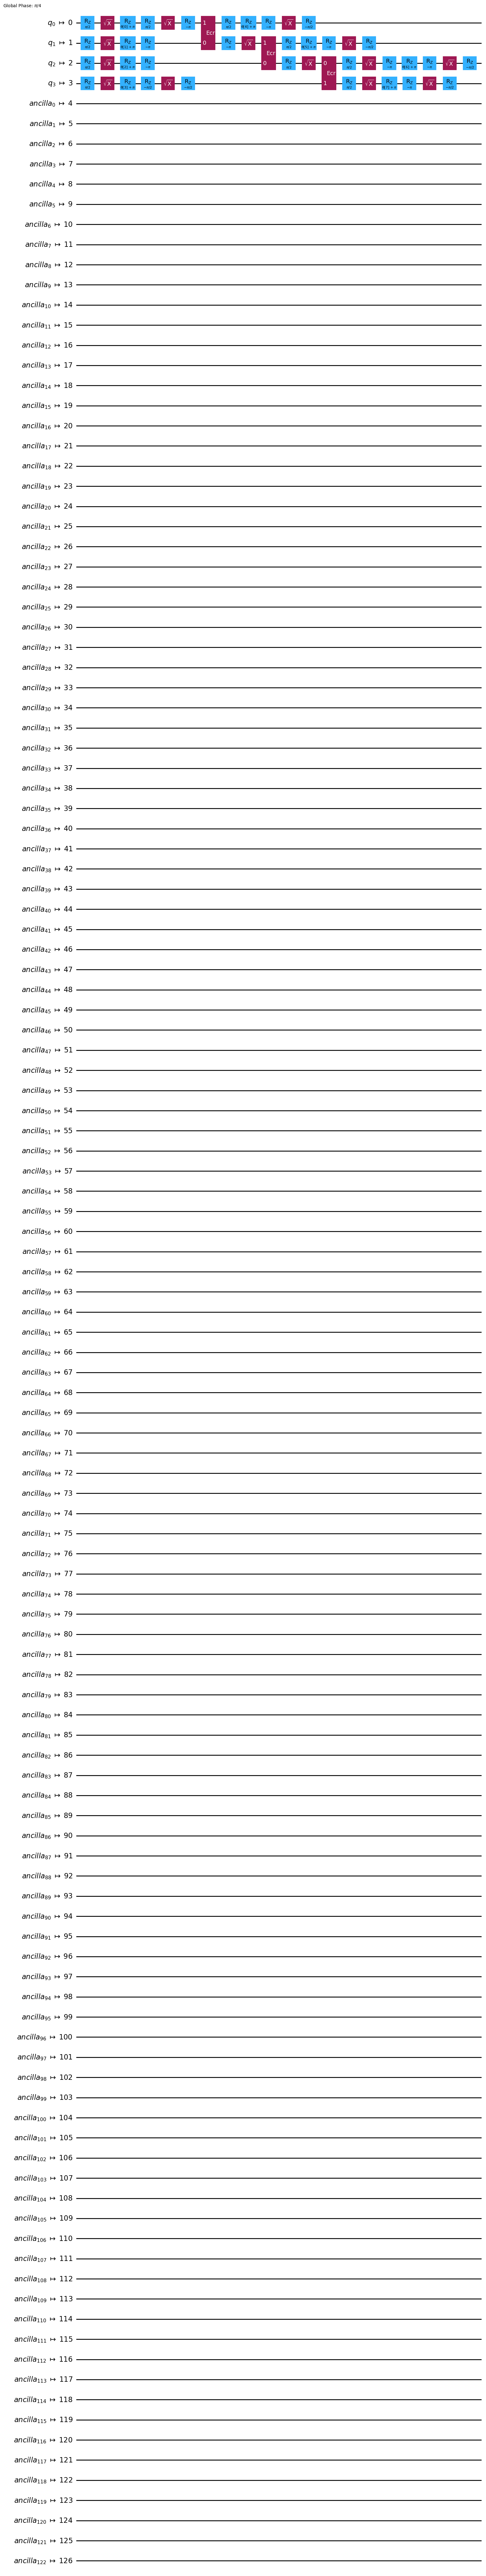

In [6]:
ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)
ansatz.decompose().draw("mpl")




from qiskit.compiler import transpile


mapped_circuit = transpile(ansatz,backend=backend)

display(mapped_circuit.draw("mpl", style="iqp"))

In [8]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)



def count_gates(ansatz: EfficientSU2):
    gate_count = {qubit: 0 for qubit in ansatz.qubits}
    for gate in ansatz.data:
        for qubit in gate.qubits:
            gate_count[qubit] += 1
    return gate_count

def remove_unused_wires(ansatz: EfficientSU2):
    gate_count = count_gates(ansatz)
    for qubit, count in gate_count.items():
        if count == 0:
            ansatz.qubits.remove(qubit)
    return ansatz

remove_unused_wires(ansatz).draw()


┌────────────────────────────────────────────────────────┐
q_0: ┤0                                                       ├
     │                                                        │
q_1: ┤1                                                       ├
     │  EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7]) │
q_2: ┤2                                                       ├
     │                                                        │
q_3: ┤3                                                       ├
     └────────────────────────────────────────────────────────┘

In [18]:
from qiskit import IBMQ
from qiskit.circuit.library import EfficientSU2
from qiskit.compiler import transpile
from qiskit.visualization import plot_bloch_multivector

# Carregue as credenciais da sua conta IBM Quantum Experience
IBMQ.load_account()

# Escolha um provedor e um backend real disponível
provider = IBMQ.get_provider(hub='your_hub', group='your_group', project='your_project')
backend = provider.get_backend('ibmq_osaka')

ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)

# Transpile o circuito para o backend escolhido
transpiled_circuit = transpile(ansatz, backend=backend)

# Antes de remover fios não utilizados
display(transpiled_circuit.draw("mpl", style="iqp"))

def count_gates(ansatz):
    gate_count = {qubit: 0 for qubit in ansatz.qubits}
    for gate in ansatz.data:
        for qubit in gate.qubits:
            gate_count[qubit] += 1
    return gate_count

def remove_unused_wires(ansatz):
    gate_count = count_gates(ansatz)
    for qubit, count in gate_count.items():
        if count == 0:
            ansatz.qubits.remove(qubit)
    return ansatz

# Após remover fios não utilizados no circuito transpilado
new_transpiled_circuit = remove_unused_wires(transpiled_circuit)
display(new_transpiled_circuit.draw("mpl", style="iqp"))

# Bloch vector
plot_bloch_multivector(ansatz)



MissingOptionalLibraryError: "The 'qiskit-ibmq-provider' library is required to use 'IBMQ provider'. You can install it with 'pip install qiskit-ibmq-provider'."

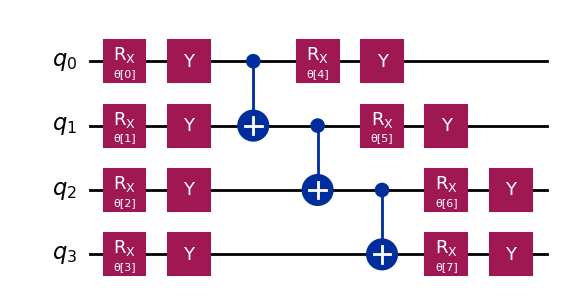

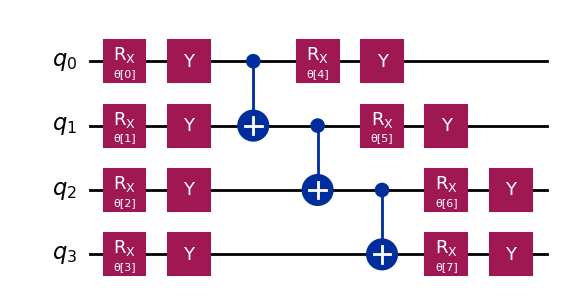

TypeError: ParameterExpression with unbound parameters (dict_keys([ParameterVectorElement(θ[0])])) cannot be cast to a float.

In [19]:
from qiskit.circuit.library import EfficientSU2
from qiskit.compiler import transpile
from qiskit.visualization import plot_bloch_multivector
from qiskit import Aer

ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)

# Escolha um backend simulador para transpilar o circuito
backend_simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(ansatz, backend=backend_simulator)

# Antes de remover fios não utilizados
display(transpiled_circuit.draw("mpl", style="iqp"))

def count_gates(ansatz):
    gate_count = {qubit: 0 for qubit in ansatz.qubits}
    for gate in ansatz.data:
        for qubit in gate.qubits:
            gate_count[qubit] += 1
    return gate_count

def remove_unused_wires(ansatz):
    gate_count = count_gates(ansatz)
    for qubit, count in gate_count.items():
        if count == 0:
            ansatz.qubits.remove(qubit)
    return ansatz

# Após remover fios não utilizados no circuito transpilado
new_transpiled_circuit = remove_unused_wires(transpiled_circuit)
display(new_transpiled_circuit.draw("mpl", style="iqp"))

# Bloch vector
plot_bloch_multivector(ansatz)

plot_bloch_multivector(ansatz)
